<a href="https://colab.research.google.com/github/BamTiss/BamTiss/blob/main/workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356239 sha256=31c28f6eb5fa961ca843585ab47242f577065754c2a57d90e4790768febc2b53
  Stored in directory: /tmp/pip-ephem-wheel-cache-1qmqlqc0/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8698dc1266b2270f809b3cf0f14657d7242699b30df977db383f38bfe43c5ad3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-pr

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-2-c03a24be5f20>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
df = pd.read_csv('winemag-data_first150k.csv', sep = ';', encoding='utf-8')

In [ ]:
df.shape

(144037, 10)

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print(df.isnull().sum())

country                 2
designation         43826
points                  5
price               13396
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64


In [8]:
df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,94


In [9]:
new_df = df.copy()
new_df['price'].fillna(df['price'].mean(), inplace = True)

In [10]:
print(new_df.isnull().sum())

country                 2
designation         43826
points                  5
price                   0
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64


In [11]:
df.isnull().mean()

country             0.000014
designation         0.304269
points              0.000035
price               0.093004
province            0.000049
region_1            0.165548
region_2            0.594701
variety             0.000035
winery              0.000035
last_year_points    0.000000
dtype: float64

In [12]:
threshold = 0.5
new_df = df[df.columns[df.isnull().mean() < threshold]]

In [13]:
new_df.isnull().mean()

country             0.000014
designation         0.304269
points              0.000035
price               0.093004
province            0.000049
region_1            0.165548
variety             0.000035
winery              0.000035
last_year_points    0.000000
dtype: float64

In [14]:
print(df.shape)

new_df = df.loc[df.isnull().mean(axis=1) < threshold]

print(new_df.shape)

(144037, 10)
(144032, 10)


In [15]:
print(new_df.isnull().sum())

country                 2
designation         43821
points                  0
price               13391
province                2
region_1            23840
region_2            85654
variety                 0
winery                  0
last_year_points        0
dtype: int64


In [17]:
print(df['price'].median())
new_df['price'] = df['price'].fillna(df['price'].median())

24.0


<ipython-input-17-c07ba55766f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = df['price'].fillna(df['price'].median())


In [18]:
print(new_df.isnull().sum())

country                 2
designation         43821
points                  0
price                   0
province                2
region_1            23840
region_2            85654
variety                 0
winery                  0
last_year_points        0
dtype: int64


In [19]:
new_df = df.fillna(0)

In [20]:
print(new_df.isnull().sum())

country             0
designation         0
points              0
price               0
province            0
region_1            0
region_2            0
variety             0
winery              0
last_year_points    0
dtype: int64


In [21]:
new_df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,0,Tinta de Toro,Bodega Carmen Rodríguez,92
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94
4,France,La Brûlade,95.0,66.0,Provence,Bandol,0,Provence red blend,Domaine de la Bégude,94


In [22]:
print(df.shape)

new_df = df.dropna(how='any')

print(new_df.shape)

(144037, 10)
(37576, 10)


In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

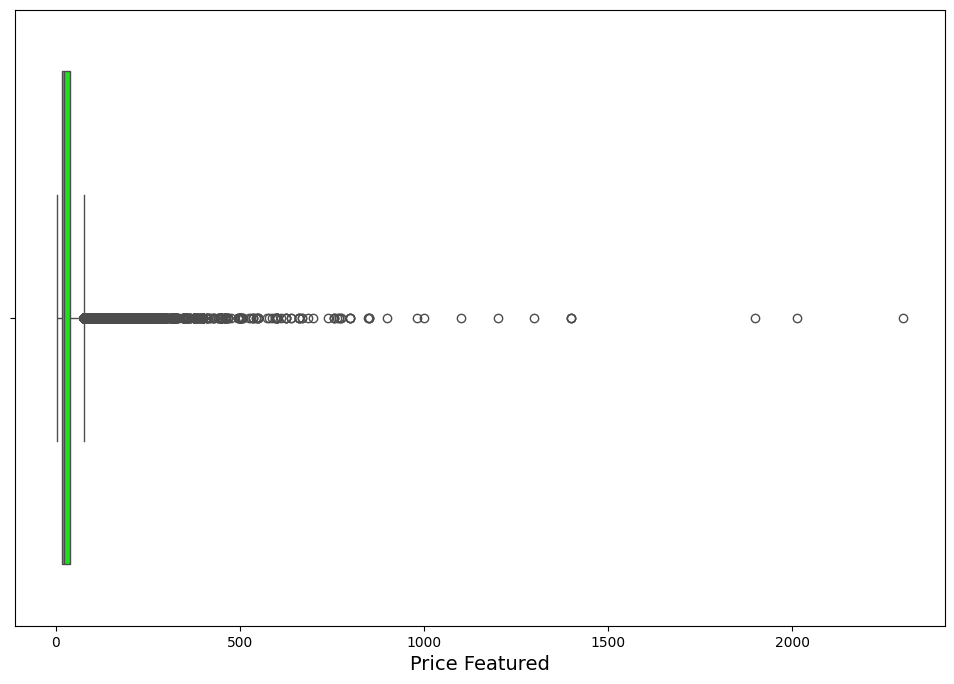

In [24]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x=df['price'], color='lime')
plt.xlabel('Price Featured', fontsize=14)
plt.savefig('boxplot.png', dpi=300)

In [25]:
df['price'].describe()

count    130641.000000
mean         33.123399
std          36.368177
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [26]:
print(df.shape)

factor = 3
upper_lim = df['price'].mean () + df['price'].std () * factor
lower_lim = df['price'].mean () - df['price'].std () * factor

drop_outlier1 = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

print(drop_outlier1.shape)

(144037, 10)
(129047, 10)


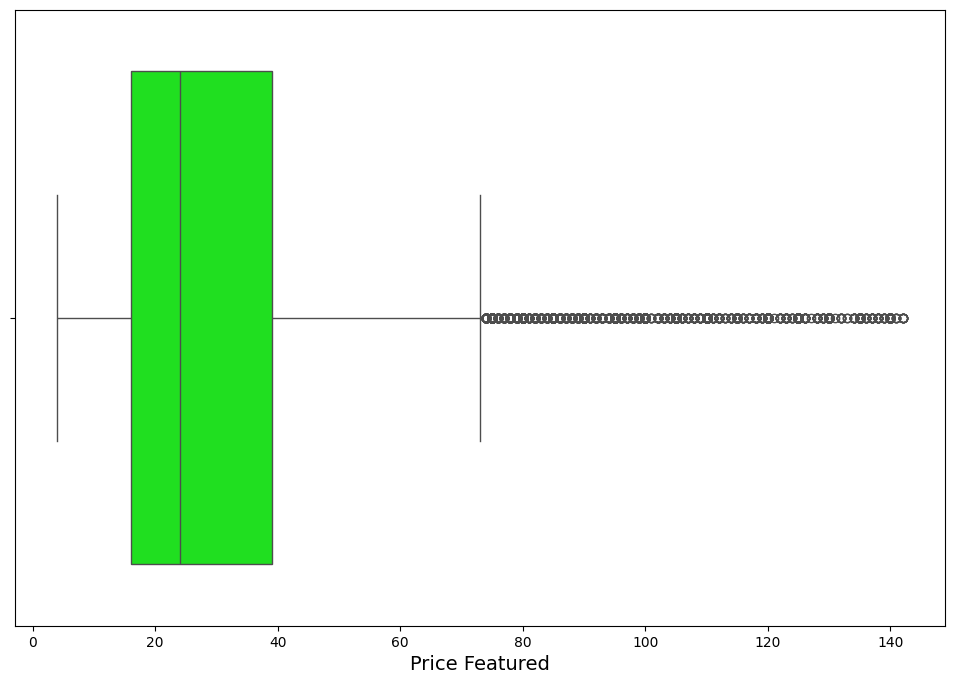

In [27]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x=drop_outlier1['price'], color='lime')
plt.xlabel('Price Featured', fontsize=14)
plt.savefig('boxplot.png', dpi=300)

In [28]:
drop_outlier1['price'].describe()

count    129047.000000
mean         30.477283
std          21.342490
min           4.000000
25%          16.000000
50%          24.000000
75%          39.000000
max         142.000000
Name: price, dtype: float64

In [29]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
test_df = pd.DataFrame(a, columns=['A'])
test_df

,A
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [30]:
test_df['A'] < 8

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9    False
Name: A, dtype: bool

In [32]:
type(test_df['A'])

pandas.core.series.Series

In [33]:
test_df['A'] > 5

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: A, dtype: bool

In [34]:
(test_df['A'] < 8) & (test_df['A'] > 5)

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
Name: A, dtype: bool

In [35]:
test_df[(test_df['A'] < 8) & (test_df['A'] > 5)]

,A
5,6
6,7


In [36]:
print(df.shape)

upper_lim = df['price'].quantile(.95)
lower_lim = df['price'].quantile(.05)

drop_outlier2 = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

print(drop_outlier2.shape)

(144037, 10)
(113852, 10)


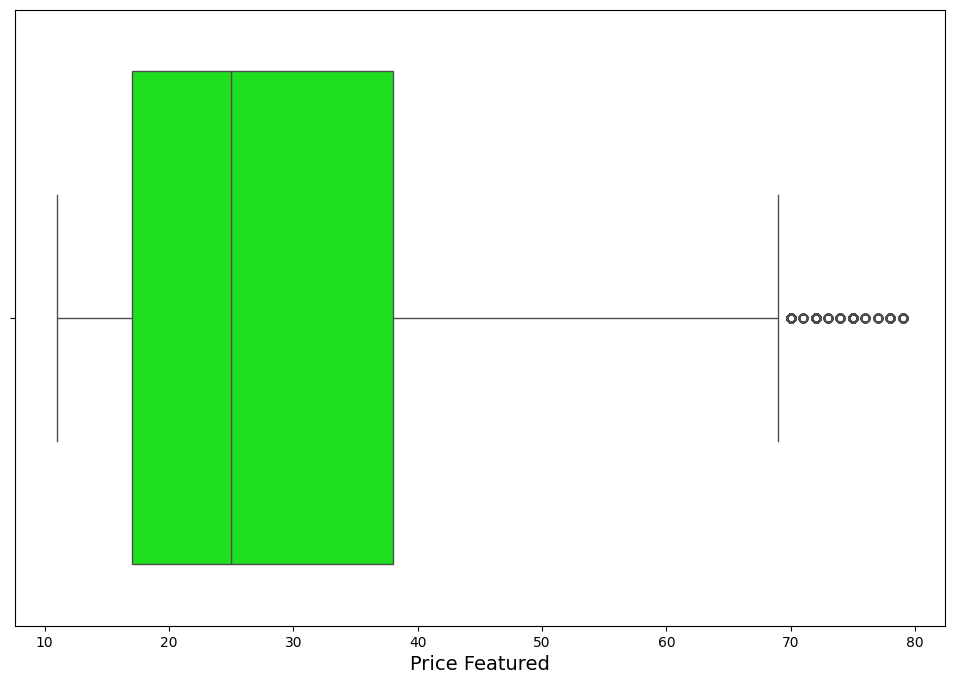

In [37]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x=drop_outlier2['price'], color='lime')
plt.xlabel('Price Featured', fontsize=14)
plt.savefig('boxplot.png', dpi=300)

In [38]:
drop_outlier2['price'].describe()

count    113852.000000
mean         29.101781
std          15.492622
min          11.000000
25%          17.000000
50%          25.000000
75%          38.000000
max          79.000000
Name: price, dtype: float64

In [39]:
labels = ['low', 'mid', 'high']
bins = [0., 20., 40., 100.]

drop_outlier2['price_cat'] = pd.cut(drop_outlier2['price'], labels=labels, bins=bins, include_lowest=False)

<ipython-input-39-b4fe99575630>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['price_cat'] = pd.cut(drop_outlier2['price'], labels=labels, bins=bins, include_lowest=False)


In [41]:
drop_outlier2.sample(n=5)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,price_cat
130801,France,Prestige,84.0,11.0,Rhône Valley,Côtes du Rhône,NaN,Rhône-style White Blend,La Châsse du Pape,84,low
70670,US,Classic Vintage Brut,86.0,38.0,California,Green Valley,Sonoma,Sparkling Blend,Iron Horse,82,mid
73636,US,Nicholas Estate,90.0,32.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Anam Cara,84,mid
82377,Italy,Vigneto ai Palazzi Riserva,90.0,35.0,Veneto,Piave,NaN,Merlot,Masottina,81,mid
92491,US,Old Vine,85.0,25.0,California,Napa Valley,Napa,Zinfandel,Girard,93,mid


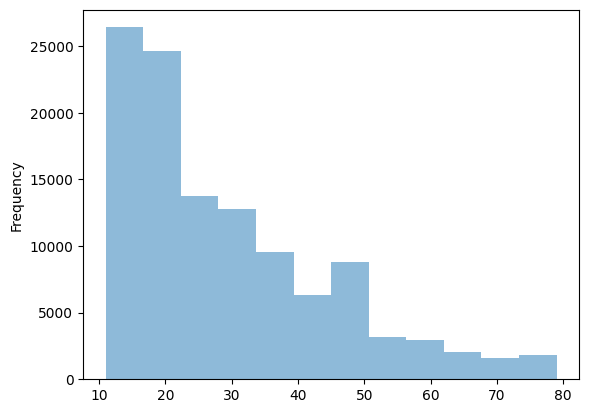

In [42]:
ax = drop_outlier2['price'].plot.hist(bins=12, alpha=0.5)
ax.figure.savefig('his.png', dpi=300)

In [43]:
drop_outlier2['log'] = drop_outlier2['price'].transform(np.log)

<ipython-input-43-407aa3dc79ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['log'] = drop_outlier2['price'].transform(np.log)


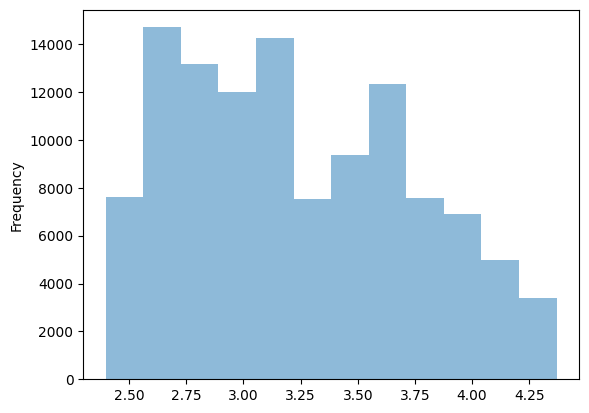

In [44]:
ax = drop_outlier2['log'].plot.hist(bins=12, alpha=0.5)
ax.figure.savefig('his.png', dpi=300)

In [45]:
drop_outlier2.sample(n=5)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,price_cat,log
136080,US,Boushey Vineyard Sirocco,89.0,29.0,Washington,Yakima Valley,Columbia Valley,White Blend,McCrea,85,mid,3.367296
129295,US,Due Rossi Barbera-Sangiovese,82.0,30.0,Pennsylvania,Pennsylvania,NaN,Red Blend,Chaddsford,94,mid,3.401197
134170,Italy,Vigna delle Raunate,91.0,23.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Mocali,81,mid,3.135494
90839,Chile,Special Reserve,82.0,13.0,Maule Valley,NaN,NaN,Merlot,Simone,88,low,2.564949
85654,France,NaN,91.0,71.0,Burgundy,Gevrey-Chambertin,NaN,Pinot Noir,Joseph Faiveley,80,high,4.262680


In [46]:
encoded_columns = pd.get_dummies(drop_outlier2['price_cat'])
drop_outlier2 = drop_outlier2.join(encoded_columns)

In [47]:
drop_outlier2.sample(n=5).head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,price_cat,log,low,mid,high
22675,US,French Connection,85.0,25.0,California,Paso Robles,Central Coast,Bordeaux-style Red Blend,EOS,84,mid,3.218876,False,True,False
138168,Spain,Flvminis,90.0,28.0,Catalonia,Montsant,NaN,Red Blend,Mas de l'Abundància,84,mid,3.332205,False,True,False
35026,US,SV Estate,87.0,40.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Stoller,100,mid,3.688879,False,True,False
95637,Argentina,Broquel,86.0,15.0,Mendoza Province,Mendoza,NaN,Pinot Noir,Trapiche,97,low,2.708050,True,False,False
11915,US,Monte Rosso Vineyard Block E44,87.0,42.0,California,Sonoma Valley,Sonoma,Zinfandel,Wine Guerrilla,92,high,3.737670,False,False,True
